In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm

from IPython.core.pylabtools import figsize
figsize(14, 5)

## Question 1

1\. Try putting in extreme values for our observations in the cheating example. What happens if we observe 25 affirmative responses? 10? 50? 

In [2]:
# Let's run the simplified model, with the observed # of yes's ranging in {10, 25, 50, 75, 90}

# Useful note on interpreting the posterior distributions:
# If we assume the second coin perfectly splits Yes and No, 
#    - then the minimum value is 25 (no one cheated)
#    - and the maximum value is 75 (everyone cheated)
# However, the coin could actually land on Yes or No more, so it's possible to get values like 10 or 90.
# When we get a value like 90, it tells us that we're CERTAIN a large number of students cheated.
# It's impossible that <40/50 students cheated, since a maximum of 50 YESes come from the coin.
# It's also pretty likely that >40/50 students cheated, since otherwise we assume our coin landed
# on >40 YESes.
    
with pm.Model() as model10:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", 0.5*p + 0.25)
    yes_responses = pm.Binomial("yes_responses", 100, p_skewed, observed=10)
    step = pm.Metropolis()
    trace10 = pm.sample(25000, step=step)
    burned_trace10 = trace10[2500:]
    
with pm.Model() as model25:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", 0.5*p + 0.25)
    yes_responses = pm.Binomial("yes_responses", 100, p_skewed, observed=25)
    step = pm.Metropolis()
    trace25 = pm.sample(25000, step=step)
    burned_trace25 = trace25[2500:]
    
with pm.Model() as model50:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", 0.5*p + 0.25)
    yes_responses = pm.Binomial("yes_responses", 100, p_skewed, observed=50)
    step = pm.Metropolis()
    trace50 = pm.sample(25000, step=step)
    burned_trace50 = trace50[2500:]
    
with pm.Model() as model75:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", 0.5*p + 0.25)
    yes_responses = pm.Binomial("yes_responses", 100, p_skewed, observed=75)
    step = pm.Metropolis()
    trace75 = pm.sample(25000, step=step)
    burned_trace75 = trace75[2500:]
    
with pm.Model() as model90:
    p = pm.Uniform("freq_cheating", 0, 1)
    p_skewed = pm.Deterministic("p_skewed", 0.5*p + 0.25)
    yes_responses = pm.Binomial("yes_responses", 100, p_skewed, observed=90)
    step = pm.Metropolis()
    trace90 = pm.sample(25000, step=step)
    burned_trace90 = trace90[2500:]

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [freq_cheating]


Sampling 2 chains for 1_000 tune and 25_000 draw iterations (2_000 + 50_000 draws total) took 17 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [freq_cheating]


Sampling 2 chains for 1_000 tune and 25_000 draw iterations (2_000 + 50_000 draws total) took 13 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [freq_cheating]


Sampling 2 chains for 1_000 tune and 25_000 draw iterations (2_000 + 50_000 draws total) took 16 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [freq_cheating]


Sampling 2 chains for 1_000 tune and 25_000 draw iterations (2_000 + 50_000 draws total) took 15 seconds.
The number of effective samples is smaller than 25% for some parameters.
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [freq_cheating]


Sampling 2 chains for 1_000 tune and 25_000 draw iterations (2_000 + 50_000 draws total) took 16 seconds.
The number of effective samples is smaller than 25% for some parameters.


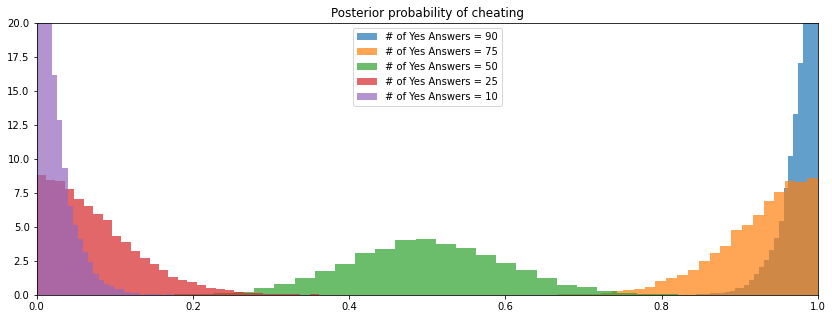

In [3]:
p_trace10 = burned_trace10["freq_cheating"]
p_trace25 = burned_trace25["freq_cheating"]
p_trace50 = burned_trace50["freq_cheating"]
p_trace75 = burned_trace75["freq_cheating"]
p_trace90 = burned_trace90["freq_cheating"]

plt.title("Posterior probability of cheating")
plt.hist(p_trace90, histtype="stepfilled", density=True, alpha=0.7, bins=30, label="# of Yes Answers = 90")
plt.hist(p_trace75, histtype="stepfilled", density=True, alpha=0.7, bins=30, label="# of Yes Answers = 75")
plt.hist(p_trace50, histtype="stepfilled", density=True, alpha=0.7, bins=30, label="# of Yes Answers = 50")
plt.hist(p_trace25, histtype="stepfilled", density=True, alpha=0.7, bins=30, label="# of Yes Answers = 25")
plt.hist(p_trace10, histtype="stepfilled", density=True, alpha=0.7, bins=30, label="# of Yes Answers = 10")

plt.ylim(0, 20)
plt.xlim(0, 1)
plt.legend();

## Question 2

2\. Try plotting $\alpha$ samples versus $\beta$ samples.  Why might the resulting plot look like this?

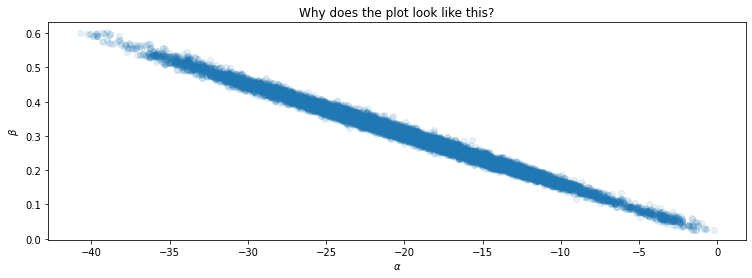

In [4]:
# alpha_samples and beta_samples are 20000 (alpha, beta) pairs sampled from the posterior distribution
# They control the logistic function that maps temperature => probability of defect

alpha_samples = np.load('alpha_samples.npy')
beta_samples = np.load('beta_samples.npy')

figsize(12.5, 4)

plt.scatter(alpha_samples, beta_samples, alpha=0.1)
plt.title("Why does the plot look like this?")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$");

Recall that: $\text{logistic}(t) = \frac{1}{ 1 + e^{ \;\beta t + \alpha } } $

In the plot, all $\alpha$ are negative, and all $\beta$ are positive. 

Positive $\beta$ means that the sigmoid goes from 1 to 0. Smaller $\beta$ is flatter. Higher $\beta$ is steeper.

Negative $\alpha$ means that the sigmoid is shifted to the right. More negative $\alpha$ is more to the right. 


What this plot is saying is that as the sigmoid gets flatter, we move it more to the left.

The sigmoid graphs of different $(\alpha, \beta)$ pairs on the plot looks like:

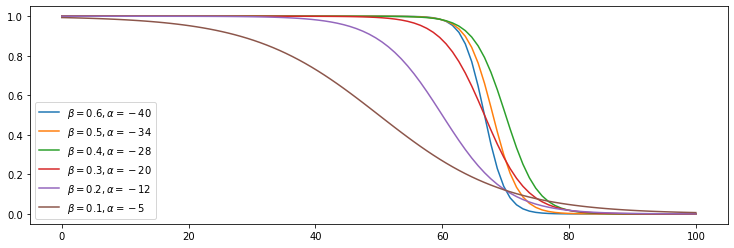

In [5]:
def logistic(x, beta, alpha=0):
    return 1.0 / (1.0 + np.exp(np.dot(beta, x) + alpha))

x = np.linspace(0, 100, 100)

plt.plot(x, logistic(x, 0.6, -40), label=r"$\beta = 0.6, \alpha = -40$")
plt.plot(x, logistic(x, 0.5, -34), label=r"$\beta = 0.5, \alpha = -34$")
plt.plot(x, logistic(x, 0.4, -28), label=r"$\beta = 0.4, \alpha = -28$")
plt.plot(x, logistic(x, 0.3, -20), label=r"$\beta = 0.3, \alpha = -20$")
plt.plot(x, logistic(x, 0.2, -12), label=r"$\beta = 0.2, \alpha = -12$")
plt.plot(x, logistic(x, 0.1, -5), label=r"$\beta = 0.1, \alpha = -5$")

plt.legend(loc="lower left");

I'm not sure how to explain the plot other than the fact that this specific family of tightly overlapping sigmoids corresponds well to our data. 

To get this family of sigmoids to be tightly overlapping, it's parameterized by the specific set of $\alpha$ and $\beta$ in the plot above.

For example, if we instead increased $\alpha$ as $\beta$ increased, we would get a nonsensical family of sigmoids that looks like:

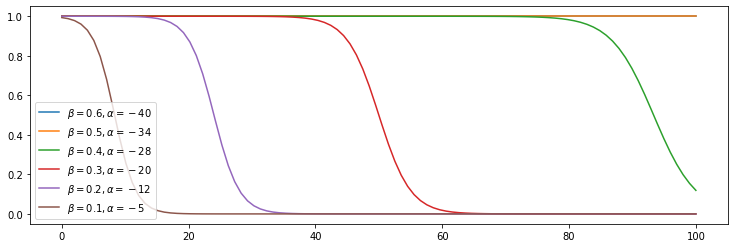

In [6]:
x = np.linspace(0, 100, 100)

plt.plot(x, logistic(x, 0.1, -40), label=r"$\beta = 0.6, \alpha = -40$")
plt.plot(x, logistic(x, 0.2, -34), label=r"$\beta = 0.5, \alpha = -34$")
plt.plot(x, logistic(x, 0.3, -28), label=r"$\beta = 0.4, \alpha = -28$")
plt.plot(x, logistic(x, 0.4, -20), label=r"$\beta = 0.3, \alpha = -20$")
plt.plot(x, logistic(x, 0.5, -12), label=r"$\beta = 0.2, \alpha = -12$")
plt.plot(x, logistic(x, 0.6, -5), label=r"$\beta = 0.1, \alpha = -5$")

plt.legend(loc="lower left");